In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler


In [2]:
df = pd.read_csv("data/data-ready.csv")
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z1,z2,z3,Year,...,Day,Hour,IsWeekend,IsNight,HourCos,HourSin,MonthCos,MonthSin,DayCos,DaySin
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299


In [3]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z1,z2,z3,Year,Month,Day,Hour,IsWeekend,IsNight,HourCos,HourSin,MonthCos,MonthSin,DayCos,DaySin
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.0,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,5.241600e+04,5.241600e+04,5.241600e+04,5.241600e+04,52416.000000,5.241600e+04
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,2017.0,6.510989,15.678571,11.500000,0.285714,0.458333,-6.940588e-17,-1.918151e-17,-5.126443e-03,-5.395884e-03,-0.021699,1.636413e-03
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,0.0,3.440642,8.771822,6.922253,0.451758,0.498266,7.071135e-01,7.071135e-01,7.075804e-01,7.066071e-01,0.699348,7.144631e-01
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,2017.0,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-0.994869,-9.987165e-01
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,2017.0,4.000000,8.000000,5.750000,0.000000,0.000000,-7.071068e-01,-7.071068e-01,-8.660254e-01,-8.660254e-01,-0.758758,-7.247928e-01
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,2017.0,7.000000,16.000000,11.500000,0.000000,0.000000,-6.123234e-17,6.123234e-17,-1.836970e-16,-2.449294e-16,-0.050649,-2.449294e-16
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,2017.0,9.250000,23.000000,17.250000,1.000000,1.000000,7.071068e-01,7.071068e-01,5.915064e-01,5.000000e-01,0.688967,7.247928e-01
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,2017.0,12.000000,31.000000,23.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,9.987165e-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   z1                     52416 non-null  float64
 7   z2                     52416 non-null  float64
 8   z3                     52416 non-null  float64
 9   Year                   52416 non-null  int64  
 10  Month                  52416 non-null  int64  
 11  Day                    52416 non-null  int64  
 12  Hour                   52416 non-null  int64  
 13  IsWeekend              52416 non-null  int64  
 14  IsNight                52416 non-null  int64  
 15  Ho

In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,z1,z2,z3,Year,...,Day,Hour,IsWeekend,IsNight,HourCos,HourSin,MonthCos,MonthSin,DayCos,DaySin
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,...,1,0,1,1,1.000000,0.000000,0.866025,5.000000e-01,0.97953,0.201299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,2017,...,30,23,1,1,0.965926,-0.258819,1.000000,-2.449294e-16,0.97953,-0.201299


In [6]:
df = df.drop("DateTime", axis=1)

<Axes: xlabel='Temperature', ylabel='Humidity'>

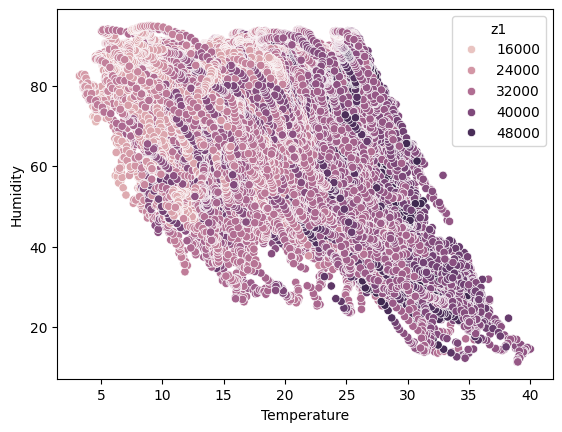

In [7]:

sns.scatterplot(x=df['Temperature'],y=df['Humidity'], hue=df['z1'])

In [8]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'z1', 'z2', 'z3', 'Year', 'Month', 'Day', 'Hour',
       'IsWeekend', 'IsNight', 'HourCos', 'HourSin', 'MonthCos', 'MonthSin',
       'DayCos', 'DaySin'],
      dtype='object')

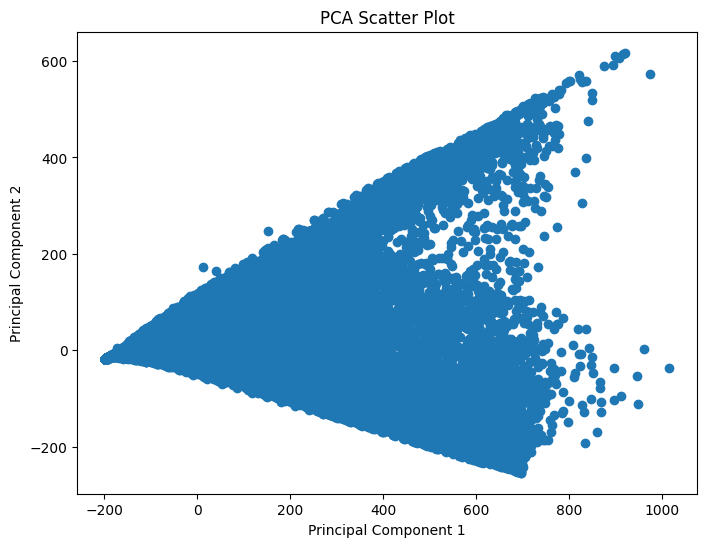

In [9]:

features = ['Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows']

# Create a PCA object. Here, we choose to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)

# Apply PCA to the data
pca_data = pca.fit_transform(df[features])

# Extract the principal components
pc1 = pca_data[:, 0]
pc2 = pca_data[:, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)

# Label the axes based on the principal components
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add a title
plt.title("PCA Scatter Plot")

# Show the plot
plt.show()


In [10]:
df_z1 = df.drop(["z2", "z3"], axis=1)
df_z2 = df.drop(["z1", "z3"], axis=1)
df_z3 = df.drop(["z1", "z2"], axis=1)

# We will conside reach zone alone

In [11]:
zones = [df_z1, df_z2, df_z3]
targets = ["z1", "z2", "z3"]

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [13]:
for zone, target in zip(zones, targets):
    print(f"===================  {target}  ==================")
    X = zone.drop(target, axis=1)
    y = zone[target]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #fit the knn model
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)
    print(f"{knn}")


    #make the predictions
    y_pred = knn.predict(X_test)
    
    #evaluate the model 
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")

    MSE = mean_squared_error(y_test, y_pred)
    print("mean_squared_error:", MSE)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")




                            

===================  z1  ==================
KNeighborsRegressor(n_neighbors=3)
R-squared: 0.9822
mean_squared_error: 913320.7106148972
Mean Absolute Error: 611.71
===================  z2  ==================
KNeighborsRegressor(n_neighbors=3)
R-squared: 0.9836
mean_squared_error: 446351.145184321
Mean Absolute Error: 423.07
===================  z3  ==================
KNeighborsRegressor(n_neighbors=3)
R-squared: 0.9903
mean_squared_error: 435810.3494317077
Mean Absolute Error: 384.78


## We will go for grid search to find the best parameters for Knn

In [14]:
# Define a parameter grid for kNN and distance metric
param_grid = {
    'n_neighbors': range(1, 11),  # Experiment with different k values
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Try different distance metrics
}


In [15]:
for zone, target in zip(zones, targets):
    print(f"===================  {target}  ==================")
    X = zone.drop(target, axis=1)
    y = zone[target]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create a kNN regressor with GridSearchCV for hyperparameter tuning
    knn_reg = KNeighborsRegressor()
    grid_search = GridSearchCV(knn_reg, param_grid, scoring='neg_mean_squared_error')  # Minimize MSE

    grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    print(f"Best model: {best_model}")


    # Make predictions on the testing data using the best model
    y_pred = best_model.predict(X_test)
    
    #evaluate the model 
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")

    MSE = mean_squared_error(y_test, y_pred)
    print("mean_squared_error:", MSE)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")




                            

===================  z1  ==================
Best model: KNeighborsRegressor(metric='manhattan', n_neighbors=2)
R-squared: 0.9845
mean_squared_error: 787555.7774192939
Mean Absolute Error: 530.21
===================  z2  ==================
Best model: KNeighborsRegressor(metric='manhattan', n_neighbors=1)
R-squared: 0.9869
mean_squared_error: 357302.3914567248
Mean Absolute Error: 384.25
===================  z3  ==================
Best model: KNeighborsRegressor(metric='manhattan', n_neighbors=1)
R-squared: 0.9909
mean_squared_error: 391542.7742165686
Mean Absolute Error: 368.34


## We will use now cross validation

In [16]:
from sklearn.model_selection import cross_val_score


=================== z1 ==================
Best score is 0.9791451300418332
Best K is 2


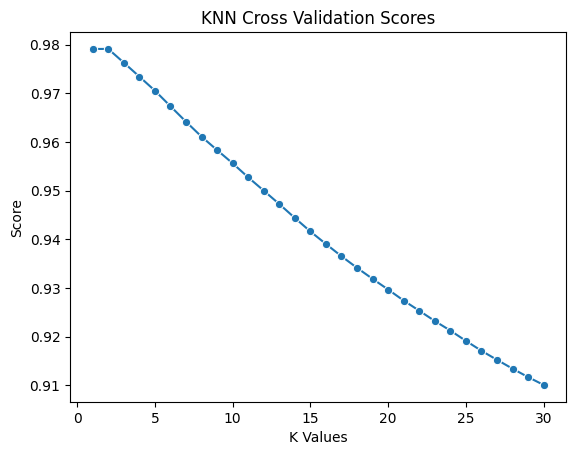

=================== z2 ==================
Best score is 0.9825708504612386
Best K is 2


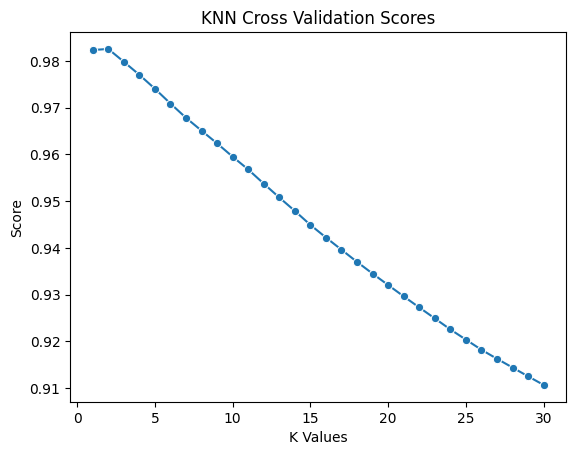

=================== z3 ==================
Best score is 0.9891476197923982
Best K is 2


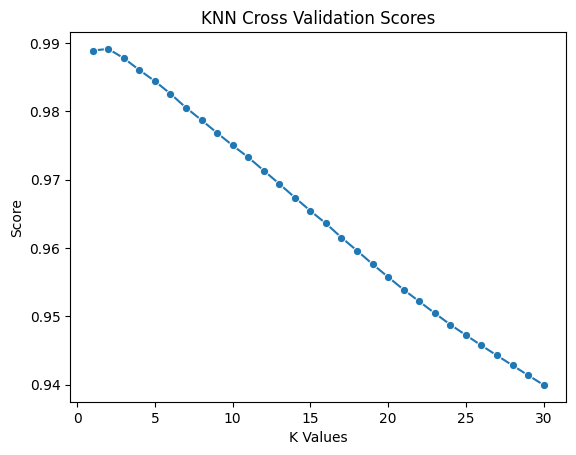

In [17]:
for zone, target in zip(zones, targets):
    print(f"=================== {target} ==================")
    X = zone.drop(target, axis=1)
    y = zone[target]

    k_values = [i for i in range(1, 31)]
    scores = []
    best_score = -float('inf')
    best_k = None

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        score = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
        scores.append(score)
        if score > best_score:
            best_score = score
            best_k = k

    sns.lineplot(x=k_values, y=scores, marker='o')
    
    print(f"Best score is {best_score}")
    print(f"Best K is {best_k}")

    plt.xlabel(f"K Values")
    plt.ylabel("Score")
    plt.title("KNN Cross Validation Scores")
    plt.show()